In [216]:
import numpy as np
import tools21cm as t2c
from astropy.io import fits
import matplotlib.pyplot as plt

In [217]:
in_path_fg = "fits_files/"
in_path_cs = "Boxes/"

output_path = "Results/"
fname_all = "test_filename"

fname_foreground = "fg_all"
fname_cs = "test"


fname_foreground = "fg_all"
fname_cs = "test"

indata_fg = fits.getdata(in_path_fg+fname_foreground+'.fits').T
indata_cs = fits.getdata(in_path_cs+fname_cs+'.fits')
noise = fits.getdata('fits_files/Noise_10000.fits').T
indata_cs = indata_cs/1000

no_sl = 342

In [218]:
#use 8.1MHZ coeval cube from lightcone, this is 27 slices of lightcone

In [240]:
def power_1D(data):
    box_dims = 128
    plt.figure(figsize=(6,6))
    for i in range(12):
        sig = data[27*i:27*(i+1),:,:]
        ps, ks = t2c.power_spectrum_1d(sig, kbins=10, box_dims = box_dims)
        plt.loglog(ks, (ps*ks**3 / (2*np.pi**2)),label = 'frequency =' + str(round(4.05 + 108 +(8.1*i),1)) + 'MHZ')
        plt.xlabel('k (Mpc$^{-1}$)')
        plt.ylabel('P(k) k$^{3}$/$(2\pi^2)$')
        plt.legend(fontsize =8)


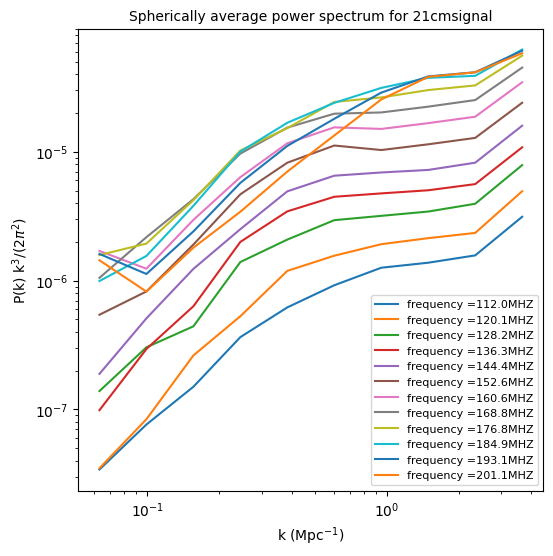

In [247]:
#21cmsignal
power_1D(indata_cs)
plt.title('Spherically average power spectrum for 21cmsignal', fontsize=10)
plt.savefig('images/powerspectrum for lightcone')

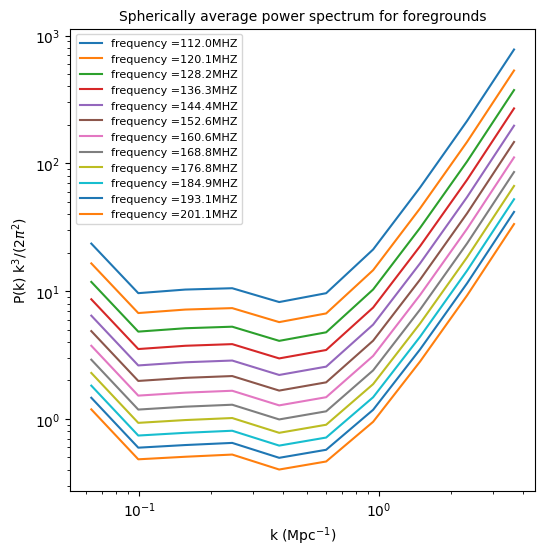

In [248]:
power_1D(indata_fg)
plt.title('Spherically average power spectrum for foregrounds', fontsize=10)

plt.savefig('images/powerspectrum for foregrounds')

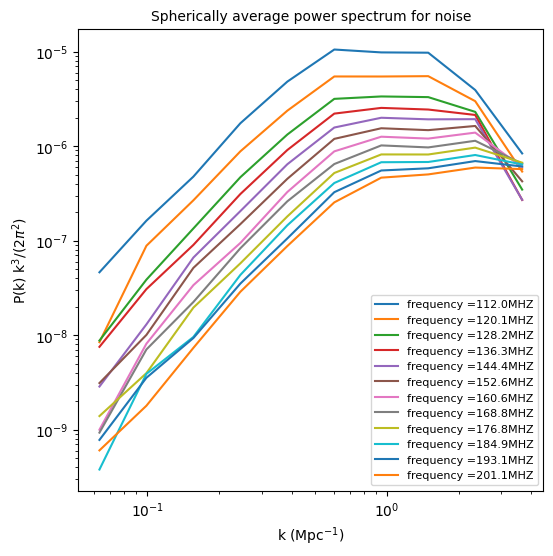

In [249]:
power_1D(noise)
plt.title('Spherically average power spectrum for noise', fontsize=10)
plt.savefig('images/powerspectrum for noise')

In [250]:
res = fits.getdata('Results/ZT0.msn_image_ncomp_4_FastICA_residual.fits')

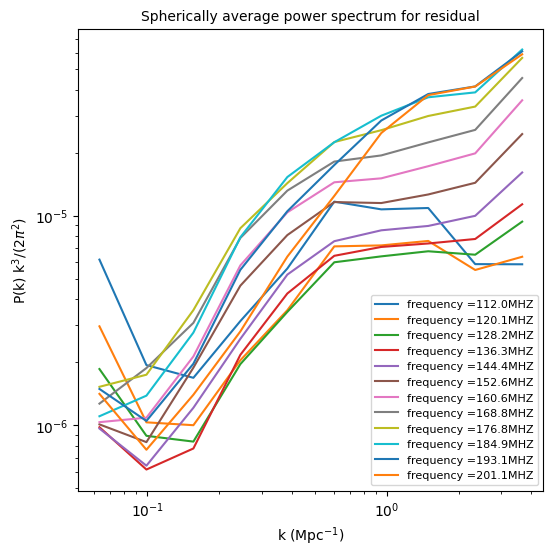

In [251]:
power_1D(res)
plt.title('Spherically average power spectrum for residual', fontsize=10)
plt.savefig('images/powerspectrum for residual')

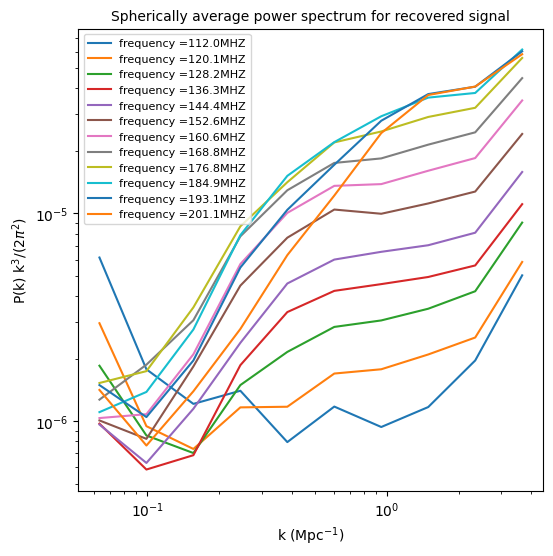

In [252]:
plt.figure(figsize=(6,6))
for i in range(12):
    residual = res[27*i:27*(i+1),:,:]
    ps_res, ks_res = t2c.power_spectrum_1d(residual, kbins=10, box_dims = box_dims)
    noise1 = noise[27*i:27*(i+1),:,:]
    ps_no, ks_no = t2c.power_spectrum_1d(noise1, kbins=10, box_dims = box_dims)

    #recovered signal
    #dosen't matter what ks you use because both values are the same
    ps = ps_res - ps_no
    
    plt.title('Spherically average power spectrum for recovered signal', fontsize=10)
    plt.loglog(ks_res, (ps*ks**3 / (2*np.pi**2)),label = 'frequency =' + str(round(4.05 + 108 +(8.1*i),1)) + 'MHZ')
    plt.xlabel('k (Mpc$^{-1}$)')
    plt.ylabel('P(k) k$^{3}$/$(2\pi^2)$')
    plt.legend(fontsize =8)
plt.savefig('images/powerspectrum for recovered signal')